<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/KMeansClustering_Facebook_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/Live.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
data = data.drop(['Column1','Column2','Column3','Column4'],axis=1)

In [7]:
data = data.drop(['status_id','status_published'],axis=1)

In [8]:
data.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [13]:
le = LabelEncoder()
data['status_type'] = le.fit_transform(data.status_type)

In [14]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [15]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]

In [16]:
x

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [17]:
y

,status_type
0,3
1,1
2,3
3,1
4,1
...,...
7045,1
7046,1
7047,1
7048,1


In [18]:
scaled = MinMaxScaler()
x = scaled.fit_transform(x)
y = scaled.fit_transform(y)

In [19]:
x

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.00636943, 0.01960784,
        0.        ],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.        , 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
y

array([[1.        ],
       [0.33333333],
       [1.        ],
       ...,
       [0.33333333],
       [0.33333333],
       [0.33333333]])

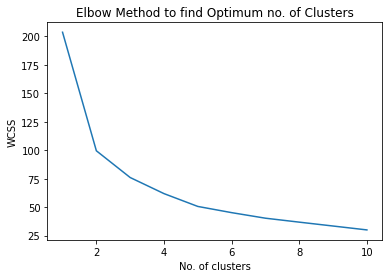

In [21]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method to find Optimum no. of Clusters')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
clusters = KMeans(n_clusters=4,random_state=42)
clusters.fit(x)

KMeans(n_clusters=4, random_state=42)

In [33]:
clusters.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [36]:
acc = np.sum(clusters.labels_==y)
print("Total {} out 7050 records labeled correctly".format(np.round(acc/float(y.size),2)))

Total 451.29 out 7050 records labeled correctly


In [38]:
data['Cluster ID'] = clusters.labels_

In [39]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster ID
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


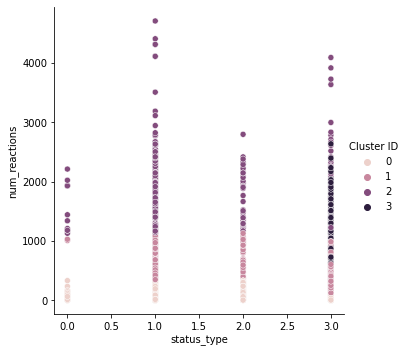

In [40]:
sns.relplot(x='status_type',y='num_reactions',data=data,hue='Cluster ID')